In [36]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import citypy module to determine city name from coordinates
from citipy import citipy
# import datetime
from datetime import datetime
import requests
from config import weather_api_key
import time

In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Create a list to hold city names
cities = []

# Identify the cities for each longitude and latitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If city is unique we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print city count to confirm
print(len(cities))

602


In [22]:
city_data = []
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Print the beginning of the logging
print('Beginning data retrieval    ')
print('----------------------------')

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
     # Run an API request for each of the cities.
   # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning data retrieval    
----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | baker city
Processing Record 3 of Set 1 | port hardy
Processing Record 4 of Set 1 | margate
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | buin
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | nantucket
Processing Record 15 of Set 1 | darhan
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | bartica
Processing Record 20 of Set 1 | belushya guba
City not found

In [23]:
len(city_data)

551

In [26]:
city_data_df = pd.DataFrame(city_data)

In [28]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,55.40,50,40,19.46,AR,2020-03-30 21:57:59
1,Baker City,44.77,-117.83,51.80,53,90,9.17,US,2020-03-30 21:58:00
2,Port Hardy,50.70,-127.42,44.60,81,75,8.05,CA,2020-03-30 21:58:00
3,Margate,51.38,1.39,44.01,86,75,6.93,GB,2020-03-30 21:58:00
4,Buin,-33.73,-70.75,86.00,23,0,6.93,CL,2020-03-30 21:58:01
5,New Norfolk,-42.78,147.06,54.00,71,75,8.05,AU,2020-03-30 21:57:49
6,Busselton,-33.65,115.33,50.00,67,33,3.22,AU,2020-03-30 21:53:51
7,Touros,-5.20,-35.46,78.80,88,40,4.70,BR,2020-03-30 21:58:02
8,Georgetown,5.41,100.34,82.00,88,20,1.12,MY,2020-03-30 21:58:02
9,Carnarvon,-24.87,113.63,66.20,68,8,16.11,AU,2020-03-30 21:54:04


In [31]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [33]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-03-30 21:57:59,-54.80,-68.30,55.40,50,40,19.46
1,Baker City,US,2020-03-30 21:58:00,44.77,-117.83,51.80,53,90,9.17
2,Port Hardy,CA,2020-03-30 21:58:00,50.70,-127.42,44.60,81,75,8.05
3,Margate,GB,2020-03-30 21:58:00,51.38,1.39,44.01,86,75,6.93
4,Buin,CL,2020-03-30 21:58:01,-33.73,-70.75,86.00,23,0,6.93


In [34]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label='City_ID')

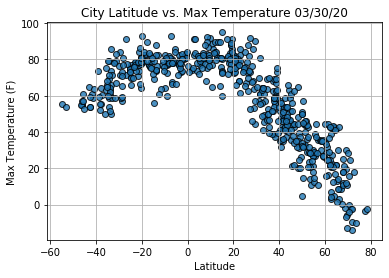

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Get today's date in seconds.
today = time.time()
today

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


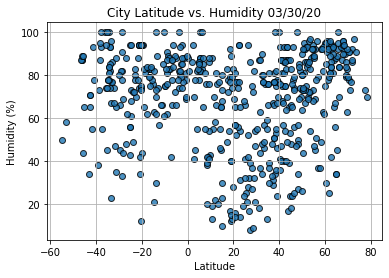

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

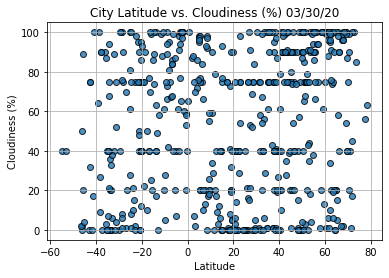

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

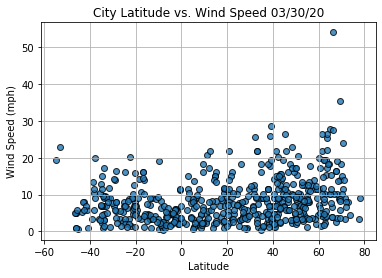

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()